# How Different Factors Affect Projectile Motion

RJ Okonowski & Josh Harris

## Table of Contents

* [Introduction](#intro)
* [Model](#model)
* [Numerical Methods](#num)
* [Results](#res)
* [Analysis](#anal)
* [Summary](#sum)
* [References](#ref)


## Introduction <a id='intro'></a>

Projectile motion is how physicists describe two-dimensional motion and is a form of motion experienced by an object that is thrown or hit near the Earth's surface and moves along a curved path, known as a parabola. Where besides the launch force which creates the initial velocity an object undergoing projectile motion the only source of acceleration is gravity which is equal to g = 9.8 $m/s^{2}$. In most cases of projectile motion, it will take the path of a parabola, this motion will have both a horizontal and vertical component. There are many different factors that can affect the projectile motion of an object, such as: the launch angle, the launch force, the air drag, and the elevation. 

The initial angle and launch force can affect many behaviors of a projectile including: the maximum height, horizontal distance traveled and the initial velocity of the projectile. Changing these factors can cause the time of flight and range of the projectile to differ with each launch. Air drag is the force of air resistance pushing in the opposite direction to the motion of the object, wind can also add to or subtract the air drag whether it creates a headwind or tailwind. These factors are very important when trying to create a realistic model of a projectile object moving through the air, since air drag has a very large affect on the motion of an object. Another factor that can change the outcome of projectile motion is the elevation, due to the changes in air density. As the elevation increases, the air density will decrease, causing a different air resistance that will change the behaviors of the projectile object. 

![xkcd](Drag.jpg)

#### Figure 1
In projectile motion, there are two components to the velocity in the x and y directions, the air drag force also has x and y components in the opposing direction of the velocity.

__NBC Video Science Behind NFL Punt:__ https://www.nbclearn.com/science-of-nfl-football/cuecard/50689

The video done by NBC News Learn, "Science of NFL Football: Projectile Motion & Parabolas" gives an interesting          introduction to the physics behind the projectile motion of an NFL punt. RJ and I found this interesting to our project because originally we were going to explore the projectile motion of a football and how it is effected by elevation and also the physics behind the perfect spiral.

## Model (in progress) <a id='model'></a>

## Numerical Methods (in progress) <a id='num'></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab

In [2]:
def solve(f,y0,interval,steps):
    """ Solve ODE by Euler method, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    
    #Calculates the size of a single step
    a = interval[0]
    b = interval[1]
    h = (b - a) / steps
    x = y0
    
    #Creates the arrays that will store the data
    tpoints = np.arange(a, b, h)
    xpoints = []
    
    #Loops for every point in tpoints
    for t in tpoints:
        #Euler's method
        xpoints.append(x)
        x += h * f(x, t)
        
    #Returns both arrays
    return (tpoints, xpoints)

In [2]:
def projectile(dt, v_init, theta, x, y, drag=False, A_m=0, elevation=False, p0=101325, y0=1e4):
    """
    Parameters:
        dt        - time step in s
        v_init    - initial velocity in m/s
        theta     - launch angle in radians
        x         - array of x values
        y         - array of y values
        drag      - boolean determining if drag force is to be calculated (optional)
        A_m       - coefficient used to calculate the drag force (optional)
        elevation - boolean determining if elevation is to be considered (optional)
        p0        - initial air density at sea level in Pa (optional)
        y0        - initial altitude in m (optional)
        
    Calculates the projectile motion of an object with the given parameters with or 
    without air drag.
    
    Returned:
        The x and y arrays containing the new values.
    """
    
    #Initializes the velocity at a specific launch angle
    vx = v_init * math.cos(theta)
    vy = v_init * math.sin(theta)
    nmax = len(x)
    
    #Loops for every element in x
    for i in range(1, nmax):
        #Uses Euler method to get the solution
        x[i] = x[i-1] + vx * dt
        y[i] = y[i-1] + vy * dt
            
        #Without air drag, only force of gravity in y direction    
        if drag == False:
            vy = vy - 9.8 * dt
            
        #With air drag, need drag force acting on both x and y
        else:
            #Calculates the drag force
            fd = A_m * math.sqrt(vx ** 2 + vy ** 2)
            
            #With the affects of elevation on air density
            if elevation == False:
                vy = vy - 9.8 * dt - fd * vy * dt
                vx = vx - fd *vx * dt
                
            #Without the affects of elevation on air density    
            else:
                #Calculates the changing air density
                p = p0 * (np.e **(-y[i] / y0))
                
                #Calculates the drag force
                f = (p / p0) * fd
                vy = vy - 9.8 * dt - f * vy * dt
                vx = vx - f *vx * dt
                
        #Checks if the projectile has reached the ground
        if y[i] <= 0:
            x[i] = x[i-1]
        
    #Returns the values to be plotted
    return x, y

## Results <a id='res'></a>

### Differential Equation Solutions

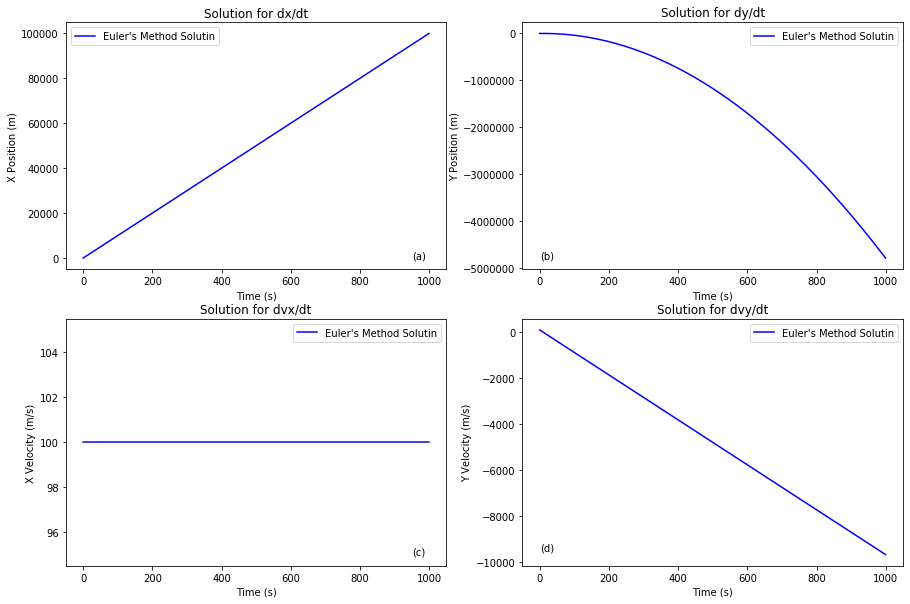

In [20]:
#Initialize the variables
x0 = 0
y0 = 0
vx0 = 100
vy0 = 100
g = 9.8 

#Function for dx/dt
def x(x, t):
    return vx0 

#Function for dvx/dt
def vx(v, t):
    return 0

#Function for dvy/dt
def vy(v, t):
    return -g

#Use our written solve function to solve for each differential equation
x1, y1 = solve(x, x0, (0,1000), 1000)
x2, y2 = solve(vx, vx0, (0,1000), 1000)
x4, y4 = solve(vy, vy0, (0,1000), 1000)

#Gunction for dy/dt
def y(y, t):
    return y4[int(t)]

x3, y3 = solve(y, y0, (0,1000), 1000)

#Creates the plot
fig,ax = plt.subplots(2,2,figsize=(15,10))

#Plots the data and sets the axes
ax[0,0].plot(x1, y1, "b", label="Euler's Method Solutin")
#ax[0].plot(t, yxa, "g", label="Exact Result")
ax[0,0].set_title("Solution for dx/dt")
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("X Position (m)")
ax[0,0].legend()
ax[1,0].plot(x2, y2, "b", label="Euler's Method Solutin")
#ax[1].plot(t, yvxa, "g", label="Exact Result")
ax[1,0].set_title("Solution for dvx/dt")
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("X Velocity (m/s)")
ax[1,0].legend()
ax[0,1].plot(x3, y3, "b", label="Euler's Method Solutin")
#ax[2].plot(t, yya, "g", label="Exact Result")
ax[0,1].set_title("Solution for dy/dt")
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Y Position (m)")
ax[0,1].legend()
ax[1,1].plot(x4, y4, "b", label="Euler's Method Solutin")
#ax[3].plot(t, yvya, "g", label="Exact Result")
ax[1,1].set_title("Solution for dvy/dt")
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Y Velocity (m/s)")
ax[1,1].legend()

#Labels each plot a,b,c,d
text1 = ax[0,0].annotate((r'(a)'), xy=(950, 0))
text2 = ax[0,1].annotate((r'(b)'), xy=(0, -4800000))
text3 = ax[1,0].annotate((r'(c)'), xy=(950, 95))
text4 = ax[1,1].annotate((r'(d)'), xy=(0, -9500))

### Projectile Motion without Air Drag

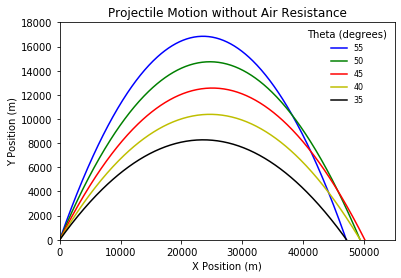

In [24]:
#Initialize the variables
dt = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi

#Creates an x and y array for each different theta value
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

#Use our projectile function to find the projectile motion without drag for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1)
x2, y2 = projectile(dt, v_init, theta2, x2, y2)
x3, y3 = projectile(dt, v_init, theta3, x3, y3)
x4, y4 = projectile(dt, v_init, theta4, x4, y4)
x5, y5 = projectile(dt, v_init, theta5, x5, y5)
        
#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="55")
ax.plot(x2, y2, "g", label="50")
ax.plot(x3, y3, "r", label="45")
ax.plot(x4, y4, "y", label="40")
ax.plot(x5, y5, "k", label="35")
ax.set_title("Projectile Motion without Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 18000)
ax.set_xlim(0, 55000)
ax.legend(title="Theta (degrees)",frameon=False, loc='upper right', prop={'size': 8})

#Shows the plot
plt.show()

### Projectile Motion with Air Drag

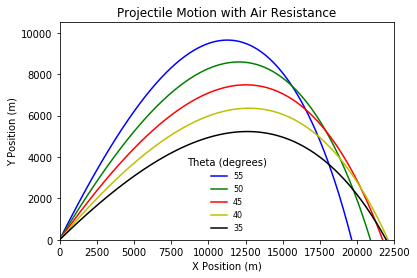

In [25]:
#Initialize the variables
t = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi
A_m = 4e-5

#Create an x and y array for each different theta value
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

#Use our projectile function to find the projectile motion with drag for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta2, x2, y2, True, A_m)
x3, y3 = projectile(dt, v_init, theta3, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta4, x4, y4, True, A_m)
x5, y5 = projectile(dt, v_init, theta5, x5, y5, True, A_m)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="55")
ax.plot(x2, y2, "g", label="50")
ax.plot(x3, y3, "r", label="45")
ax.plot(x4, y4, "y", label="40")
ax.plot(x5, y5, "k", label="35")
ax.set_title("Projectile Motion with Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10500)
ax.set_xlim(0, 22500)
ax.legend(title="Theta (degrees)", frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

### Projectile Motion with Changing Air Density

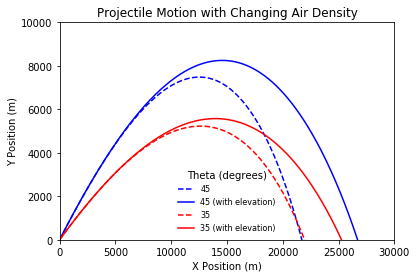

In [26]:
#Initialize the variables
dt = 0.25
v_init = 700
theta1 = (45 / 180) * math.pi
theta2 = (35 / 180) * math.pi
A_m = 4e-5

#Create an x and y array for each different case
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)

#Use our projectile function to find the projectile motion with changing air density for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta1, x2, y2, True, A_m, True)
x3, y3 = projectile(dt, v_init, theta2, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta2, x4, y4, True, A_m, True)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b--", label="45")
ax.plot(x2, y2, "b", label="45 (with elevation)")
ax.plot(x3, y3, "r--", label="35")
ax.plot(x4, y4, "r", label="35 (with elevation)")
ax.set_title("Projectile Motion with Changing Air Density")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10000)
ax.set_xlim(0, 30000)
ax.legend(title="Theta (degrees)", frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

## Analysis <a id='anal'></a>

## Summary <a id='sum'></a>

## References <a id='ref'></a>

[1] Giordano, Nicholas J. Computational Physics. Prentice-Hall, Inc., 1997. p. 23-28

[2] H. Fearn, and C. Horn. On the Flight of the Ameican Football. Unpublished, 2007, pp. 1–22, On the Flight of the Ameican Football.

[3] Newman, Mark. Computational Physics. Createspace, 2013.

[4] NBC. “Science of NFL Football: Projectile Motion &amp; Parabolas.” NBC Learn, 7 Sept. 2010, www.nbclearn.com/science-of-nfl-football/cuecard/50689.